## PCA

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding

In [2]:
iris = datasets.load_iris()
X = iris['data']
Y = iris['target']

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

## Sklearn

In [5]:
pca = PCA(n_components = 3)
X2D = pca.fit_transform(X)

In [6]:
pca.components_.T  # originally present as horizontal vectors

array([[ 0.36138659,  0.65658877, -0.58202985],
       [-0.08452251,  0.73016143,  0.59791083],
       [ 0.85667061, -0.17337266,  0.07623608],
       [ 0.3582892 , -0.07548102,  0.54583143]])

In [7]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [8]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [9]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

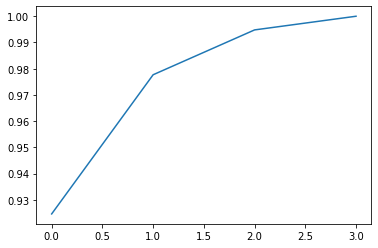

In [10]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
plt.plot(cumsum)

In [11]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [12]:
# Reconstruction error
mean_squared_error(X ,X_recovered)

0.02534107393239826

## IPCA

In [13]:
n_batches = 4
inc_pca = IncrementalPCA(n_components=2)
for X_batch in np.array_split(X, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X)

## kPCA

In [14]:
swiss = datasets.make_swiss_roll(n_samples=1000)
X = swiss[0]
Y = swiss[1]

In [15]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.1)
X_reduced = rbf_pca.fit_transform(X)

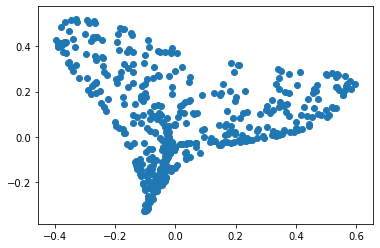

In [16]:
plt.scatter(X_reduced[:,0],X_reduced[:,1])

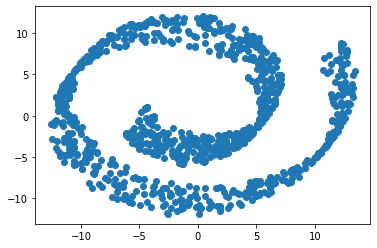

In [17]:
rbf_pca = KernelPCA(n_components = 2, kernel="linear", gamma=0.1)
X_reduced = rbf_pca.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1])

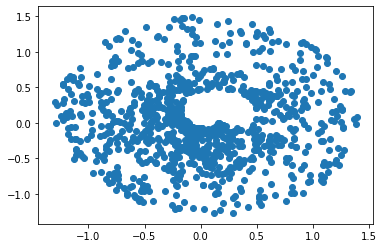

In [18]:
rbf_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.1)
X_reduced = rbf_pca.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1])

## Using Grid search CV

In [19]:
iris = datasets.load_iris()
X = iris["data"] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [20]:
clf = Pipeline([("kpca", KernelPCA(n_components=2)),
                ("log_reg", LogisticRegression())])
param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10),
               "kpca__kernel": ["rbf", "sigmoid"]}]
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
G:\Anaconda\envs\tensorflow_cpu\lib\site-packages\sk

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [21]:
grid_search.best_params_

{'kpca__gamma': 0.05, 'kpca__kernel': 'rbf'}

## LLE

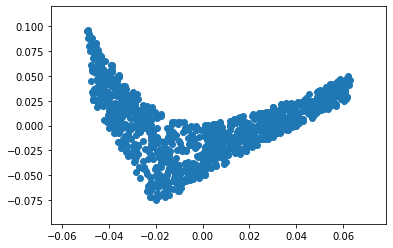

In [22]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X = swiss[0]
Y = swiss[1]
X_reduced = lle.fit_transform(X)
plt.scatter(X_reduced[:,0],X_reduced[:,1])